## **데이터 로딩(Data Loading)**
---
### **(1) 라이브러리 불러오기**
* Pandas : 데이터를 분석할 때 사용하는 파이썬 라이브러리입니다. 데이터 구조 중 데이터프레임(DataFrame)을 주로 사용합니다.
* Numpy : 행렬, 다차원배열, 데이터 구조 및 수치 계산을 효율적으로 할 수 있는 파이썬 라이브러리입니다.
* Matlotlib, Seaborn : 수치 및 그래프 시각화를 위해 사용하는 라이브러리입니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 브라우저에서 바로 그림을 볼 수 있게 해줍니다.
%matplotlib inline

### **(2) 데이터 불러오기**

In [2]:
train_df = pd.read_csv('/aiffel/data/train.csv')
test_df = pd.read_csv('/aiffel/data/test_truelabels.csv')

## **데이터 확인**

In [3]:
print('+++++++++++++++++++++++++++++++') 
print('Train size:', train_df.shape)   # 학습 데이터의 배열(크기) 확인 
print('Test size:', test_df.shape)  # 테스트 데이터의 배열(크기) 확인
print('-------------------------------')
print('Train columns :', train_df.columns.values)  # 학습 데이터의 변수 확인 
print('Test columns :', test_df.columns.values )   # 테스트 데이터의 변수 확인 
print('+++++++++++++++++++++++++++++++')

+++++++++++++++++++++++++++++++
Train size: (891, 12)
Test size: (418, 12)
-------------------------------
Train columns : ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
Test columns : ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked' 'Survived']
+++++++++++++++++++++++++++++++


In [4]:
# 학습 데이터 중 상위 5개의 데이터 확인 
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 학습 데이터의 전반적인 정보 확인
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **데이터 전처리**
---
### **(1) 변수 제거**
* PassengerId, Name : 각 고유한 승객 ID와 이름은 데이터를 설명하는 특정 정보를 포함하고 있지 않습니다.
* Ticket, Fare : Pclass와 동일한 정보를 가지고 있습니다.
* Cabin : Ticket, Fare와 동일한 정보가 포함되어 있습니다.

In [6]:
train_df = train_df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin'], axis=1)
print(train_df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')


In [7]:
# 문제 1-1. 변수를 제거한 학습 데이터를 확인해 봅시다.   

# 변수가 제거된 데이터의 전반적인 내용을 확인하는 코드를 적어주세요.  
train_df.info()

# 데이터를 복사하는 코드를 적어 보세요. 
train_df = train_df.copy()

# 복사된 데이터의 전반적인 내용을 확인하는 코드를 적어주세요.  
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4

### **(2) 결측치 채우기**

In [8]:
train_df['Age'] = train_df['Age'].fillna(0)
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
print('The most frequent value:',train_df['Embarked'].mode()[0])
train_df.info()

The most frequent value: S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [9]:
# 학습 데이터 중 하위 5개의 데이터 확인
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,0.0,1,2,S
889,1,1,male,26.0,0,0,C
890,0,3,male,32.0,0,0,Q


### **(3) 변수 변환**
* Sex는 1과 0으로 성별을 나누어 의미를 가지도록 하였습니다.
* Embarked는 각 항구를 의미하는 C, Q, S를 각각 0, 1, 2로 표현하여 의미를 부여했습니다.

In [10]:
train_df["Sex"] = train_df["Sex"].astype('category')
train_df["Sex"] = train_df["Sex"].cat.codes

# 문제 1-2. 변수 Embarked를 숫자형으로 변환하고, 데이터프레임 전체에 적용해 보세요. 
train_df["Embarked"] = train_df["Embarked"].astype('category')
train_df["Embarked"] = train_df["Embarked"].cat.codes # category -> int8로 변환

# 문제 1-3. 학습 데이터 중 하위 5개의 데이터를 확인해 보세요. 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int8   
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    int8   
dtypes: float64(1), int64(4), int8(2)
memory usage: 36.7 KB


## **데이터 탐색 및 시각화**
---
### **EDA**
### **(1) 데이터 통계량 탐색**

In [11]:
# 데이터 통계량 탐색
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,23.799293,0.523008,0.381594,1.536476
std,0.486592,0.836071,0.477990,17.596074,1.102743,0.806057,0.791503
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,2.000000


### **(2) Label과의 연관성**

In [12]:
for i in range(1,train_df.shape[1]): 
    print(train_df[[train_df.columns[i], "Survived"]].groupby([train_df.columns[i]], as_index=False).
          mean().sort_values(by='Survived', ascending=False))
    print('===================================')

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
   Sex  Survived
0    0  0.742038
1    1  0.188908
      Age  Survived
88  80.00       1.0
80  63.00       1.0
17  12.00       1.0
1    0.42       1.0
10   5.00       1.0
..    ...       ...
47  34.50       0.0
62  46.00       0.0
61  45.50       0.0
50  36.50       0.0
31  23.50       0.0

[89 rows x 2 columns]
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
   Embarked  Survived
0         0  0.553571
1         1  0.389610
2         2  0.339009


* Pclass : 1등급 객실에 승선하고 있는 인원의 생존율이 높음을 알 수 있습니다.
* Sex : 여성(0)의 생존율이 높음을 알 수 있습니다.
* nSibSp : 형제자매 및 배우자의 수를 뜻합니다. 다른 변수와의 상관 관계를 통해 어떤 패턴이 있는지 파악해야 합니다.
* Parch : 부모 및 자녀의 수를 의미합니다. 다른 변수와의 상관 관계를 통해 어떤 패턴이 있는지 파악해야 합니다.
* Embarked : C 항구에서 탑승한 탑승객의 생존율이 높음을 알 수 있습니다. 그러나 실제 C 항구에서 탑승한 탑승객이 더 많은지 등을 파악해야 합니다.

### **(3) 각 변수들의 분포도**

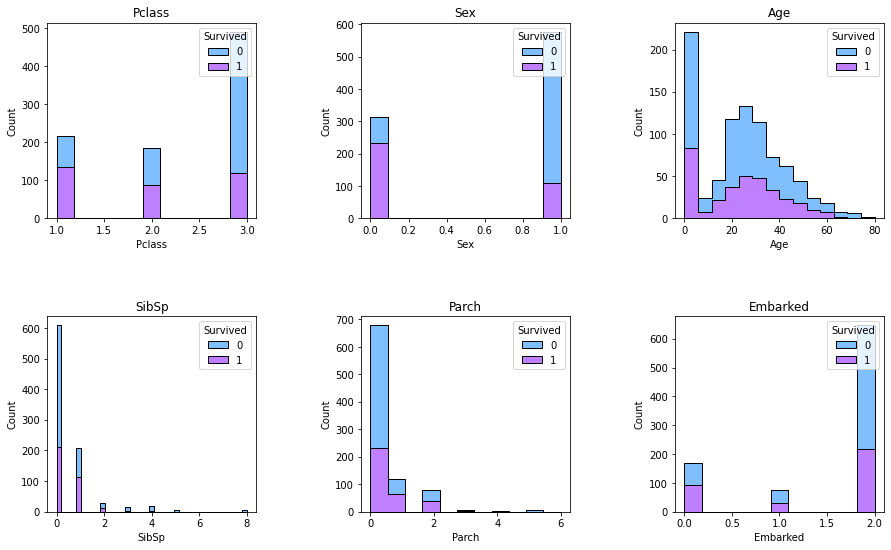

In [13]:
# 히스토그램
col_name = train_df.columns[1:] 

fig, axs = plt.subplots(2,3, figsize=(15, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5) # 플롯(plot)간의 간격 조정
axs = axs.ravel()  # 다차원 배열을 1차원으로 변경

for i in range(col_name.shape[0]):
    sns.histplot(data=train_df,x=train_df[col_name[i]],hue='Survived',palette='cool',
                 multiple="stack",ax=axs[i], element="step")
    axs[i].set_title(col_name[i])

* facecolor: 그림의 배경색을 지정하며 'w'는 흰색(white)을 의미한다.
* edgecolot: 그림의 테두리 색상을 지정하며 'k'는 검은색(black)을 의미한다.
* multiple: 'stack'으로 설정하면 다른 범주(Survived=0,1)의 값들이 서로 위에 쌓인 형태로 표시된다.
* element: 'step'으로 설정하면 히스토그램의 막대를 점선으로 표시한다.

<Figure size 648x648 with 0 Axes>

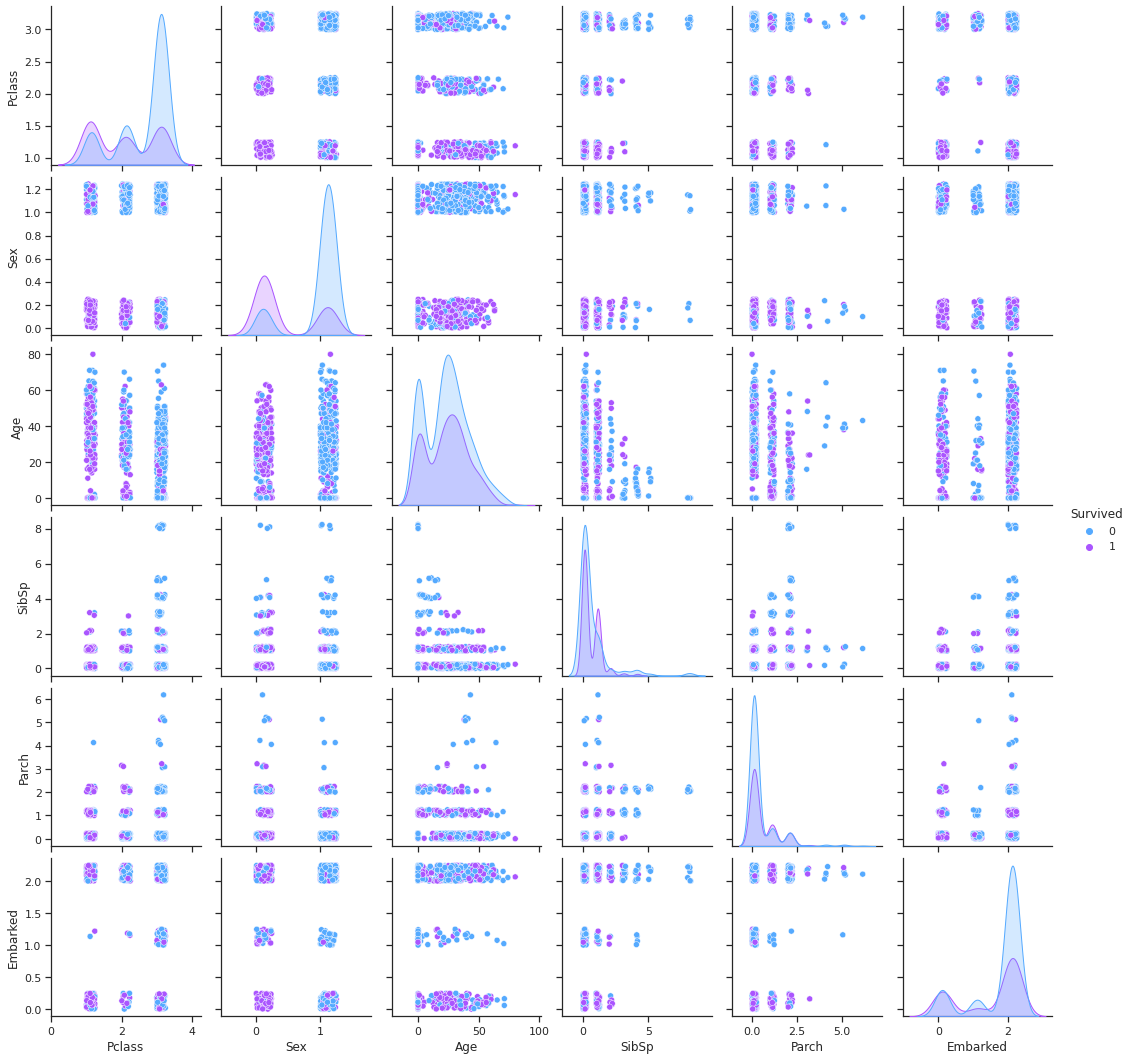

In [14]:
# 산점도(pairplot)
train_df_rand = train_df.copy()

plt.figure(figsize=(9,9))
rand = pd.DataFrame(np.random.randint(0,100,size=train_df.iloc[:,1:].shape), # 정수를 무작위로 생성 
                  columns=train_df.iloc[:,1:].columns)/400 # 0과 0.25 사이의 값으로 변환
train_df_rand.iloc[:,1:]=train_df.iloc[:,1:]+rand
sns.set(style="ticks") # 스타일 지정
sns.pairplot(train_df_rand,hue='Survived',palette='cool')

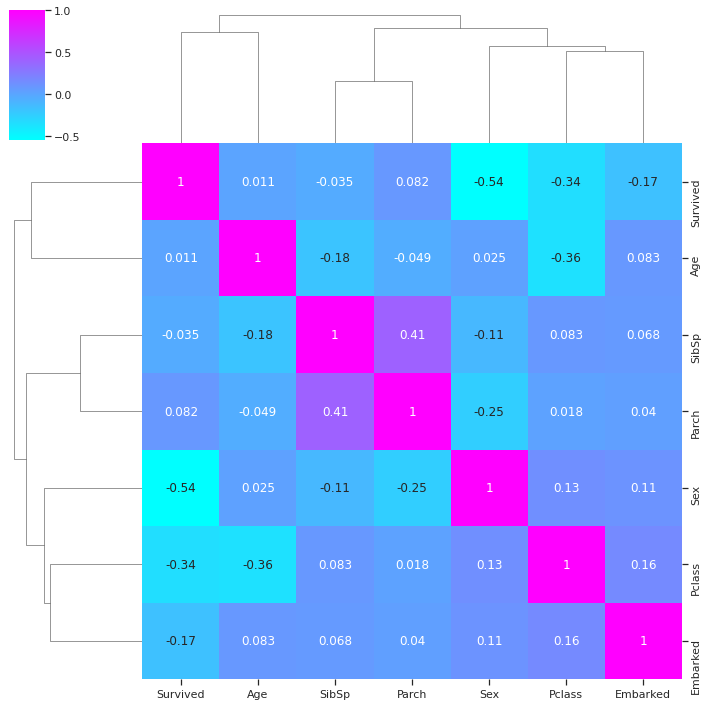

In [15]:
# 클러스터맵(clustermap) = 히트맵(heatmap) + 덴드로그램(Dendrogram)
corr = train_df.corr()
sns.clustermap(corr,annot = True,cmap = 'cool')

## **모델링**
---
### **(1) 학습 데이터 준비**

In [16]:
X_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']
print(X_train.shape, y_train.shape)

(891, 6) (891,)


### **(2) 테스트 데이터 전처리**

In [17]:
# 문제 2. 테스트 데이터를 전처리해 보세요. 
# test_df에서 필요 없는 변수를 제거해 주세요.
test_df = test_df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin'], axis=1)

# 변수 Age의 결측치를 0으로 변환해 주세요. 
test_df['Age'] = test_df['Age'].fillna(0)

# # 변수 Embarked의 결측치를 가장 빈도수가 높은 항구로 채워주세요. 
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])
print('The most frequent value:', test_df['Embarked'].mode()[0])

# 변수 Sex와 Embarked의 데이터를 숫자형으로 변환하고, 데이터프레임 전체에 적용해 주세요. 
test_df["Sex"] =  test_df["Sex"].astype('category')
test_df["Sex"] =  test_df["Sex"].cat.codes

test_df["Embarked"] =  test_df["Embarked"].astype('category')
test_df["Embarked"] =  test_df["Embarked"].cat.codes

# test_df를 X_test와 y_test로 분리해주세요. (종속 변수: Survived)
X_test = test_df.drop('Survived', axis=1)
y_test = test_df['Survived']

# 테스트 데이터의 전반적인 정보를 확인해 주세요. 
test_df.info()

# 테스트 데이터의 모양을 구해 주세요. 
test_df.shape

The most frequent value: S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int8   
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    int8   
 6   Survived  418 non-null    int64  
dtypes: float64(1), int64(4), int8(2)
memory usage: 17.3 KB


(418, 7)

### **(3) 교차 검증**
모형이 학습 데이터에 과도하게 최적화되면 새로운 데이터로 테스트할 경우, 예측 성능이 떨어지게 되는 과적합이 일어나는 것을 방지하기 위해 교차 검증을 수행합니다.

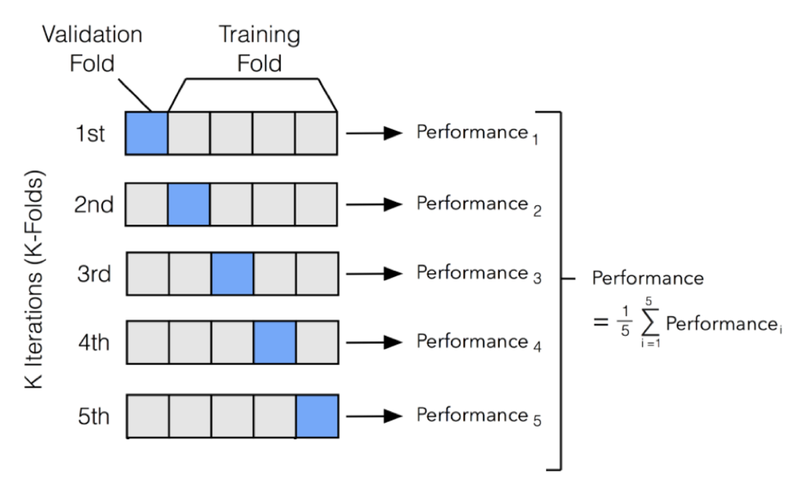

In [18]:
from sklearn.model_selection import KFold

def kfold(X_train,y_train,clf):
    clf_score = []
    kf = KFold(n_splits = 5, shuffle = True, random_state = 50)
    
    for tra_index, val_index in kf.split(X_train):
        X_tra, X_val = X_train.iloc[tra_index,:], X_train.iloc[val_index,:]
        y_tra, y_val = y_train.iloc[tra_index], y_train.iloc[val_index]
        
        clf.fit(X_tra, y_tra) 
        
        y_pred = clf.predict(X_val) 
        clf_score.append(clf.score(X_val, y_val))
    
    print("Score:", np.mean(clf_score))

### **(4) 모형 평가(Model evaluation)**
* Support Vector Machine(SVM): 서포트 벡터 머신
* K-Nearest Neighbor(KNN): K-최근접 이웃
* Stochastic Gradient Descent(SGD): 확률적 경사 하강법
* Logistic Regression: 로지스틱 회귀
* Decision Tree: 결정 나무
* Random Forest: 랜덤 포레스트

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score

import matplotlib.ticker as ticker  # x축 스케일 조절

In [20]:
import warnings
warnings.filterwarnings('ignore')  # 워닝 무시하기

models = [
    SVC(gamma='auto'), 
    KNeighborsClassifier(n_neighbors=3),
    SGDClassifier(max_iter=100, tol=1e-3),
    SGDClassifier(),
    LogisticRegression(solver='lbfgs'), 
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(n_estimators=100)
]


for clf in models:
    print('===================================')
    print("model:",clf)
    kfold(X_train, y_train, clf)

model: SVC(gamma='auto')
Score: 0.7923294206264516
model: KNeighborsClassifier(n_neighbors=3)
Score: 0.7575481765112045
model: SGDClassifier(max_iter=100)
Score: 0.6678049086686334
model: SGDClassifier()
Score: 0.6600213420375368
model: LogisticRegression()
Score: 0.7856317870817902
model: DecisionTreeClassifier(max_depth=10)
Score: 0.777810558031511
model: RandomForestClassifier()
Score: 0.7856380641516539


## **성능 평가**
---
### **(1) ROC-AUC 확인하기**
AUC는 1에 가까울수록 높은 성능이다!

AUC: 0.8022517039922104


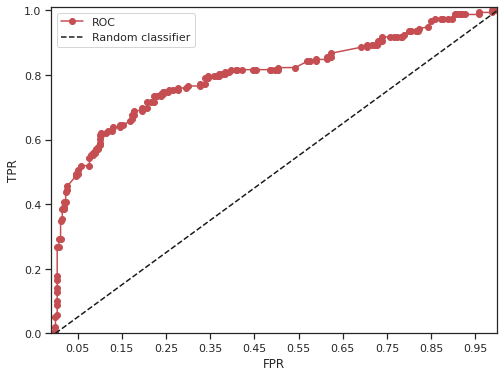

In [21]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:,1]

plt.figure(figsize=(8,6))

def roc_curve_plot(y_test, y_pred):
    fprs, tprs, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fprs, tprs, 'ro-',label='ROC')
    plt.plot([0,1],[0,1], 'k--', label='Random classifier')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(-0.01, 1); plt.ylim(0, 1.01)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()

roc_curve_plot(y_test, y_pred)
print("AUC:",roc_auc_score(y_test, y_pred))

AUC: 0.790494157740993


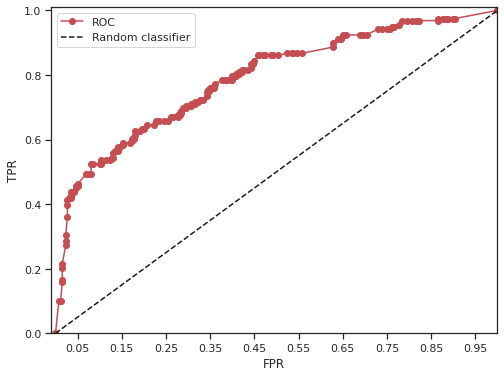

In [22]:
# 문제 3. 직접 코드를 작성하여 랜덤 포레스트 모형의 성능을 평가하고, ROC-AUC를 그려 보세요. 
clf = RandomForestClassifier(n_estimators=100, random_state=33)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:,1]

plt.figure(figsize=(8,6))

def roc_curve_plot(y_test, y_pred):
    fprs, tprs, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fprs, tprs, 'ro-',label='ROC')
    plt.plot([0,1],[0,1], 'k--', label='Random classifier')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(-0.01, 1); plt.ylim(0, 1.01)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()

roc_curve_plot(y_test, y_pred)
print("AUC:",roc_auc_score(y_test, y_pred))